<a href="https://colab.research.google.com/github/prawinrajan/Deep-Learning-and-neural-network-EBOOKS/blob/master/prepare_own_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam
from keras.utils import np_utils

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
import theano
from PIL import Image
from numpy import *

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [0]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [0]:
img_rows, img_cols = 200, 200

In [0]:
# number of channels
img_channels = 1

In [0]:
#  data

path1 = '/content/face'    #path of folder of images    
path2 = '/content/gray_scale_images'  #path of folder to save images    

In [6]:
#get number of sample presented in the image
listing = os.listdir(path1)
num_samples=size(listing)
print(num_samples)

20


In [0]:
#preprocessing images
for file in listing:
    im = Image.open(path1 + '/' + file)  
    img = im.resize((img_rows,img_cols))
    gray = img.convert('L')
                #need to do some more processing here          
    gray.save(path2 +'/' +  file, "JPEG")

In [0]:
imlist = os.listdir(path2)

In [0]:
im1 = array(Image.open('/content/gray_scale_images' + '/'+ imlist[0])) # open one image to get size
m,n = im1.shape[0:2] # get the size of the images
imnbr = len(imlist) # get the number of images

In [0]:
# create matrix to store all flattened images
immatrix = array([array(Image.open('/content/gray_scale_images'+ '/' + im2)).flatten()
              for im2 in imlist],'f')

In [0]:
label=np.ones((num_samples,),dtype = int)
label[0:11]=0
label[11:21]=1

In [12]:
data,Label = shuffle(immatrix,label, random_state=2)
train_data = [data,Label]

'''input_shape=img_data[0].shap
'''

'input_shape=img_data[0].shap\n'

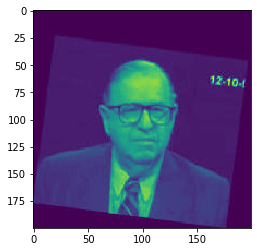

In [13]:
img=immatrix[10].reshape(img_rows,img_cols)
plt.imshow(img)

(20, 40000)
(20,)


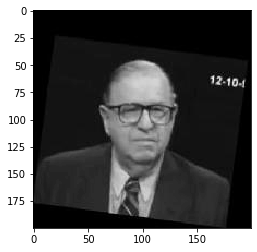

In [14]:
plt.imshow(img,cmap='gray')
print(train_data[0].shape)
print(train_data[1].shape)


In [0]:
#batch_size to train
batch_size = 32
# number of output classes
nb_classes = 3
# number of epochs to train
nb_epoch = 20


# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
nb_pool = 2
# convolution kernel size
nb_conv = 3

In [0]:
(X, y) = (train_data[0],train_data[1])

In [0]:
# STEP 1: split X and y into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [0]:
X_train = X_train.reshape(X_train.shape[0],img_rows, img_cols,1)
X_test = X_test.reshape(X_test.shape[0],img_rows, img_cols,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [0]:
X_train /= 255
X_test /= 255

In [21]:
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (16, 200, 200, 1)
16 train samples
4 test samples


In [0]:
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)


In [23]:
 X_train[0].shape

(200, 200, 1)

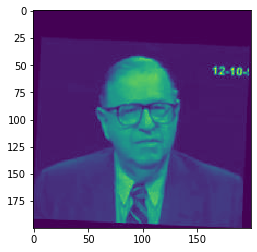

In [24]:
img=X_train[10].reshape(img_rows,img_cols)
plt.imshow(img)

In [25]:
model = Sequential()

In [26]:
model.add(Convolution2D(nb_filters, nb_conv, nb_conv,border_mode='valid', input_shape=( img_rows, img_cols,1
                                                                                       )))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(200, 200,..., padding="valid")`
  """Entry point for launching an IPython kernel.


In [27]:
convout1 = Activation('relu')
model.add(convout1)
model.add(Convolution2D(nb_filters, nb_conv, nb_conv))
convout2 = Activation('relu')
model.add(convout2)
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adadelta')



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  This is separate from the ipykernel package so we can avoid doing imports until


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 198, 198, 32)      320       
_________________________________________________________________
activation_1 (Activation)    (None, 198, 198, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 196, 196, 32)      9248      
_________________________________________________________________
activation_2 (Activation)    (None, 196, 196, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 98, 98, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 98, 98, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 307328)           

In [28]:
hist = model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=20, verbose=1, validation_data=(X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 16 samples, validate on 4 samples
Epoch 1/20
16/16 [==============================] - 4s 254ms/step - loss: 1.0847 - val_loss: 2.0374
Epoch 2/20
16/16 [==============================] - 2s 149ms/step - loss: 1.5768 - val_loss: 1.2961
Epoch 3/20
16/16 [==============================] - 2s 148ms/step - loss: 2.7232 - val_loss: 0.7707
Epoch 4/20
16/16 [==============================] - 3s 161ms/step - loss: 0.7578 - val_loss: 0.7071
Epoch 5/20
16/16 [==============================] - 2s 148ms/step - loss: 0.6204 - val_loss: 0.7105
Epoch 6/20
16/16 [==============================] - 2s 150ms/step - loss: 0.7479 - val_loss: 0.8015
Epoch 7/20
16/16 [==============================] - 2s 149ms/step - loss: 0.6434 - val_loss: 0.7433
Epoch 8/20
16/16 [==============================] - 2s 148ms/step - loss: 0.6377 - val_loss: 0.7947
Epoch 9/20
16/16 [==============================] - 2s 148ms/st

In [0]:
fname = "/content/weights-Test-CNN.hdf5"
model.save_weights(fname,overwrite=True)

In [49]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 198, 198, 32)      320       
_________________________________________________________________
activation_1 (Activation)    (None, 198, 198, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 196, 196, 32)      9248      
_________________________________________________________________
activation_2 (Activation)    (None, 196, 196, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 98, 98, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 98, 98, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 307328)           